# Задание к лабораторной работе №8 по машинному обучению

линейная регрессия, полиномиаьная регрессия, регуляризация, логистическая регрессия

Датасет для задачи регрессии - load_diabetes

Датасет для задачи классификации - load_breast_cancer

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, roc_auc_score,roc_curve

1. Регрессия. Применить линейную (и модели с регуляризацией) и полиномиальную регрессию к датасету load_diabetes. Вывести метрики R2, MSE, MAE для двух моделей. Построить scatterplot predicted vs. true.

Набор данных Sklearn Diabetes включает следующие атрибуты:

1)возраст: Возраст в годах
2)пол: Пол пациента
3)ИМТ: индекс массы тела
4)АД: Среднее артериальное давление
5)s1: Общий холестерин сыворотки (tc)
6)s2: Липопротеины низкой плотности (ЛПНП)
7)s3: Липопротеины высокой плотности (ЛВП)
8)s4: Общий холестерин/ЛПВП (tch)
9)s5: Возможный логарифм уровня триглицеридов в сыворотке (ltg)
10)s6: Уровень сахара в крови (glu)

In [52]:
#Датасет для задачи регрессии - load_diabetes
data = load_diabetes()
X = data.data
y = data.target
#Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
#cоздаем класс, конструктор и метод transform для дальнейшего удобства
class LinearFeatures:

    def __init__(self):
        pass

    def transform(self,X):
        return X

In [54]:
#создаем объект для генерации полиномиальных признаков (второго порядка) и объект класса LinearFeatures
pf = PolynomialFeatures(degree=2, include_bias=True)
pf.fit(X_train)
lf = LinearFeatures()

In [74]:
linear_regression = LinearRegression()
linear_regression.fit(lf.transform(X_train),y_train)
pred_res_1 = linear_regression.predict(lf.transform(X_test))
r2_1 = r2_score(y_test, pred_res_1)
mape_1 = mean_absolute_error(y_test, pred_res_1)
mean_1 = mean_squared_error(y_test, pred_res_1)
print(f'Linear regression R2 score: {r2_1}','\n')
print(f'Linear regression MAPE: {mape_1}', '\n')
print(f'Linear regression MEAN: {mean_1}', '\n')


Linear regression R2 score: 0.4772897164322617 

Linear regression MAPE: 41.91937845679274 

Linear regression MEAN: 2821.750981001311 



In [57]:
ridge = Ridge()
ridge.fit(lf.transform(X_train),y_train)
pred_res_2 = ridge.predict(lf.transform(X_test))
r2_2 = r2_score(y_test, pred_res_2)
mape_2 = mean_absolute_error(y_test, pred_res_2)
mean_2 = mean_squared_error(y_test, pred_res_2)
print(f'ridge R2 score: {r2_2}','\n')
print(f'ridge MAPE: {mape_2}', '\n')
print(f'ridge MEAN: {mean_2}', '\n')

ridge R2 score: 0.4233440269603015 

ridge MAPE: 45.46352769933713 

ridge MEAN: 3112.9664151980814 



In [85]:
lasso = Lasso()
lasso.fit(lf.transform(X_train),y_train)
pred_res_3 = lasso.predict(lf.transform(X_test))
r2_3 = r2_score(y_test, pred_res_3)
mape_3 = mean_absolute_error(y_test, pred_res_3)
mean_3 = mean_squared_error(y_test, pred_res_3)
print(f'lasso R2 score: {r2_3}','\n')
print(f'lasso MAPE: {mape_3}', '\n')
print(f'lasso MEAN: {mean_3}', '\n')

lasso R2 score: 0.36189802861957876 

lasso MAPE: 49.20790052364458 

lasso MEAN: 3444.670824977634 



In [86]:
elastic = ElasticNet()
elastic.fit(lf.transform(X_train),y_train)
pred_res_4 = elastic.predict(lf.transform(X_test))
r2_4 = r2_score(y_test, pred_res_4)
mape_4 = mean_absolute_error(y_test, pred_res_4)
mean_4 = mean_squared_error(y_test, pred_res_4)
print(f'elastic R2 score: {r2_4}','\n')
print(f'elastic MAPE: {mape_4}', '\n')
print(f'elastic MEAN: {mean_4}', '\n')

elastic R2 score: 0.0031070233135319647 

elastic MAPE: 63.935903555202415 

elastic MEAN: 5381.535093816118 



In [87]:
pr = LinearRegression()
pr.fit(pf.transform(X_train),y_train)
pred_res_5 = pr.predict(pf.transform(X_test))
r2_5 = r2_score(y_test, pred_res_5)
mape_5 = mean_absolute_error(y_test, pred_res_5)
mean_5 = mean_squared_error(y_test, pred_res_5)
print(f'Polynomial R2 score: {r2_5}','\n')
print(f'Polynomial MAPE: {mape_5}', '\n')
print(f'Polynomial MEAN: {mean_5}', '\n')

Polynomial R2 score: 0.41297706916212173 

Polynomial MAPE: 44.22139588944647 

Polynomial MEAN: 3168.930443947139 



Линейная регрессия (Linear Regression) показала наименьшую среднюю абсолютную ошибку (MAE) и наибольшую R^2 оценку. Это означает, что модель лучше всего приближает реальные значения целевой переменной и, следовательно, показывает лучшую производительность по сравнению с другими моделями в этом конкретном случае.

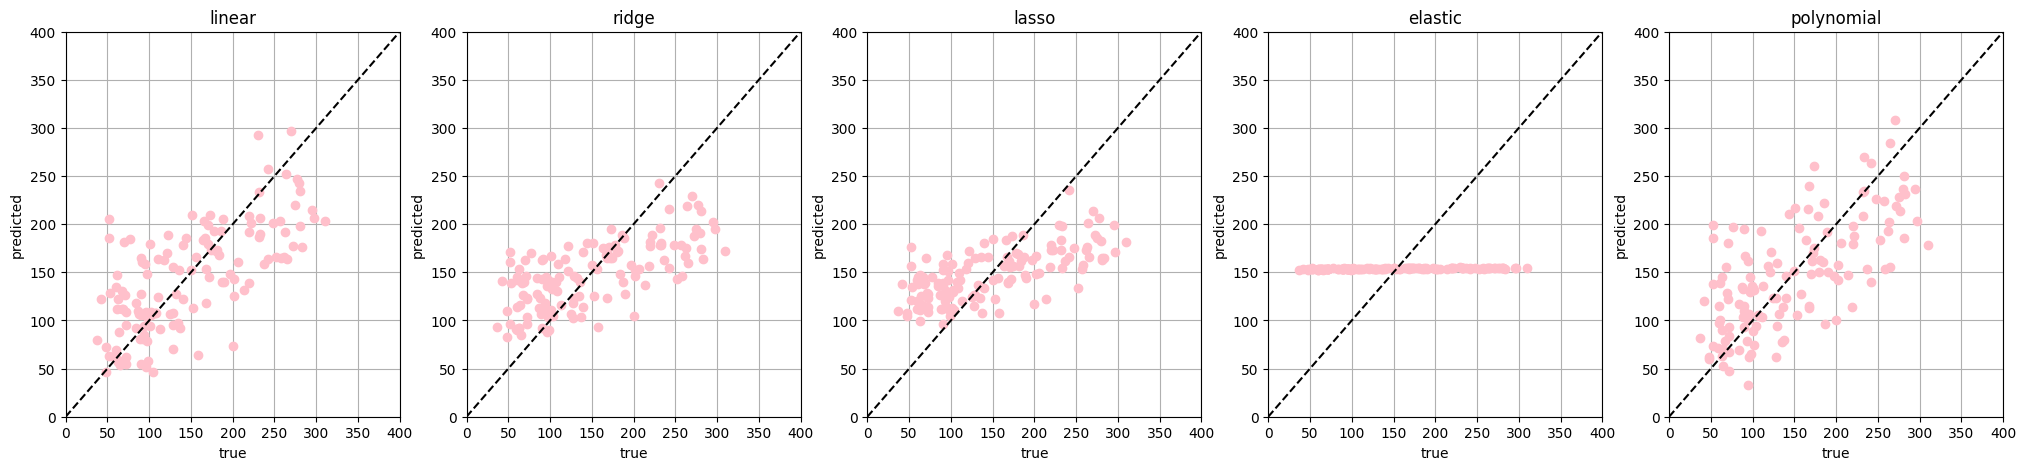

In [90]:
# визуализируем данные
fig, axs = plt.subplots(1,5,figsize=(25,5))
for model_name, ax in zip(['linear','ridge','lasso','elastic','polynomial'],axs):
    ax.plot(y_test,predictions[model_name],'o',color = 'pink')
    ax.plot(np.arange(400),np.arange(400),'--',color='black')
    ax.set_title(model_name)
    ax.set_xlabel('true')
    ax.set_ylabel('predicted')
    ax.set_xlim(0,400)
    ax.set_ylim(0,400)
    ax.grid()

Модель Elastic Net неэффективна для этой задачи, в то время как другие модели показывают удовлетворительные результаты.

2. Классификация. Найти оптимальное значение параметра регуляризации $C$ с помощью LogisticRegressionCV – перебора параметров по сетке с последующей кросс-валидацией. Этот класс создан специально для логистической регрессии (для нее известны эффективные алгоритмы перебора параметров), для произвольной модели мы бы использовали GridSearchCV, RandomizedSearchCV. Построить график зависимости метрики ROC-AUC от параметра С.

In [91]:
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
# Создаем модель логистической регрессии, которая будет автоматически подбирать оптимальный параметр регуляризации C
# с помощью 10-кратной перекрестной проверки.  Обучаем модель с помощью ROC AUC
lrcv = LogisticRegressionCV(Cs=np.arange(0.1,2,0.1,dtype=np.float32),cv=10,scoring='roc_auc',max_iter=10000)
lrcv.fit(X_train,y_train)

LogisticRegressionCV(Cs=array([0.1       , 0.2       , 0.3       , 0.4       , 0.5       ,
       0.6       , 0.70000005, 0.8       , 0.90000004, 1.        ,
       1.1       , 1.2       , 1.3000001 , 1.4000001 , 1.5       ,
       1.6       , 1.7       , 1.8000001 , 1.9000001 ], dtype=float32),
                     cv=10, max_iter=10000, scoring='roc_auc')

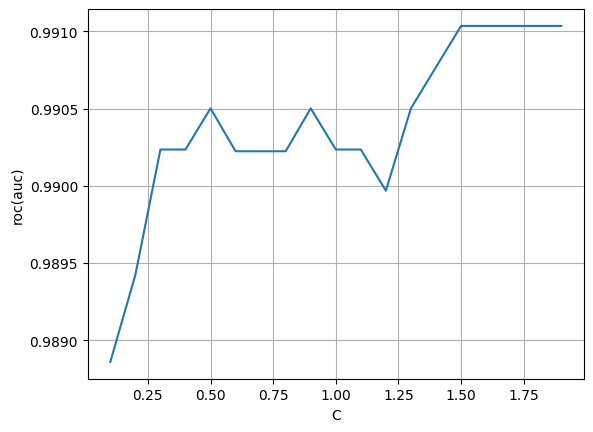

In [93]:
plt.plot(lrcv.Cs_,lrcv.scores_[1].mean(0))
plt.grid()
plt.xlabel('C')
plt.ylabel('roc(auc)')
plt.show()

На основе данного графика можно сделать вывод, что оптимальное значение параметра С для данной модели находится в диапазоне от 1 до 1.5.

In [20]:
print(f'Best C: {lrcv.C_[0]}')

Best C: 1.5


In [22]:
# оценим качество logistic regression на тестовой выборке
y_pred_proba = lrcv.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_proba)

0.997501469723692

Получили достаточно высокую точность

In [23]:
# создаем интерактивную ROC-кривую с помощью библиотеки Plotly в Python.
fpr, tpr, trh = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

trace = go.Scatter(x=fpr, y=tpr, mode='lines', name='AUC = %0.5f' % auc,
                   line=dict(color='darkorange', width=2))
reference_line = go.Scatter(x=[0,1], y=[0,1], mode='lines', name='Reference Line',
                            line=dict(color='navy', width=2, dash='dash'))
fig = go.Figure(data=[trace, reference_line])
fig.update_layout(title='Interactive ROC Curve',
                  xaxis_title='False Positive Rate',
                  yaxis_title='True Positive Rate')
fig.show()

Данный график ROC демонстрирует высокое качество модели классификации. Она обладает высокой точностью и показывает значительное превосходство над случайным предсказанием.

3. Выбрать порог классификации для LogisticRegression на основе метрики

In [24]:
print(f'Лучшее значение tp_rate = {tpr.max()} достигается при пороге {trh[tpr.argmax()]}\nfp_rate при данном значении равно {fpr[tpr.argmax()]}')

Лучшее значение tp_rate = 1.0 достигается при пороге 0.059912452374284886
fp_rate при данном значении равно 0.07936507936507936
